# Inputs

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM

from sklearn.metrics import mean_squared_error


# Dataset

In [34]:
df = pd.read_csv(
    './Data_lab_2/Khabarovsk_weather_15102020_15102012.csv', 
    sep=';', 
    encoding='windows-1251'
)

df

,LocalTime,T,P0,P,U,DD
0,15.10.2020 23:30,4.0,753.6,760.5,48.0,Ветер
1,15.10.2020 23:00,4.0,753.6,760.5,48.0,Ветер
2,15.10.2020 22:30,5.0,753.6,760.5,42.0,Ветер
3,15.10.2020 22:00,5.0,753.6,760.5,42.0,Ветер
4,15.10.2020 21:30,5.0,753.6,760.5,45.0,Ветер
...,...,...,...,...,...,...
119669,15.10.2012 03:00,2.0,750.0,756.9,100.0,Ветер
119670,15.10.2012 02:30,3.0,750.0,756.9,93.0,Ветер
119671,15.10.2012 02:00,3.0,749.3,756.2,100.0,Ветер
119672,15.10.2012 01:00,3.0,749.3,756.2,100.0,Ветер


In [35]:
df.isna().sum()

LocalTime     0
T             9
P0           10
P             7
U             9
DD           12
dtype: int64

In [36]:
df = df.dropna()

In [37]:
df = df.drop(columns = ['LocalTime', 'DD'])

for col in df.columns:
    if col != 'T':
        df[col] = MinMaxScaler().fit_transform(df[col].array.reshape(-1, 1))

df

,T,P0,P,U
0,4.0,0.622271,0.612903,0.452632
1,4.0,0.622271,0.612903,0.452632
2,5.0,0.622271,0.612903,0.389474
3,5.0,0.622271,0.612903,0.389474
4,5.0,0.622271,0.612903,0.421053
...,...,...,...,...
119669,2.0,0.543668,0.535484,1.000000
119670,3.0,0.543668,0.535484,0.926316
119671,3.0,0.528384,0.520430,1.000000
119672,3.0,0.528384,0.520430,1.000000


# Learning

In [38]:
X = df.drop(['T'],axis=1)
y = df['T']

X_all_train,X_test,y_all_train,y_test = train_test_split(
    X, 
    y, 
    test_size = 0.3, 
    random_state = 10
)

X_train, X_val, y_train, y_val = train_test_split(
    X_all_train, 
    y_all_train,
    test_size = 0.2,
    random_state = 10
)

## Densу

### №1

In [39]:
regressorModel = Sequential()
regressorModel.add(Dense(15, activation='relu', input_dim=X_train.shape[1]))
regressorModel.add(Dense(1))
regressorModel.compile(
    optimizer='adam',
    loss='mse',
    metrics='mae'
)

In [40]:
regressorHistory = regressorModel.fit(
    X_train, 
    y_train, 
    batch_size=10, 
    epochs=100,
    validation_data=(X_val,y_val)
)

Epoch 1/100
6701/6701 [==============================] - 10s 1ms/step - loss: 208.9816 - mae: 12.5037 - val_loss: 186.4918 - val_mae: 11.6648
Epoch 2/100
6701/6701 [==============================] - 10s 2ms/step - loss: 170.4958 - mae: 11.0323 - val_loss: 167.4109 - val_mae: 10.8496
Epoch 3/100
6701/6701 [==============================] - 9s 1ms/step - loss: 160.5283 - mae: 10.5801 - val_loss: 161.5003 - val_mae: 10.5434
Epoch 4/100
6701/6701 [==============================] - 9s 1ms/step - loss: 156.6597 - mae: 10.3929 - val_loss: 158.2016 - val_mae: 10.4057
Epoch 5/100
6701/6701 [==============================] - 9s 1ms/step - loss: 154.1818 - mae: 10.2719 - val_loss: 156.2005 - val_mae: 10.2952
Epoch 6/100
6701/6701 [==============================] - 9s 1ms/step - loss: 152.2743 - mae: 10.1754 - val_loss: 154.9524 - val_mae: 10.1910
Epoch 7/100
6701/6701 [==============================] - 9s 1ms/step - loss: 150.7583 - mae: 10.1000 - val_loss: 153.9461 - val_mae: 10.2519
Epoch 8/100

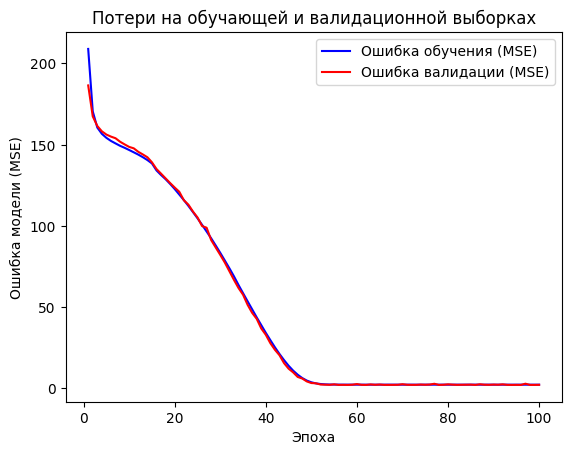

In [41]:
loss_function = regressorHistory.history['loss']
val_loss_function = regressorHistory.history['val_loss']
epochs = range(1,len(loss_function)+1)

plt.title('Потери на обучающей и валидационной выборках')
plt.plot(epochs,loss_function,color='blue',label='Ошибка обучения (MSE)')
plt.plot(epochs,val_loss_function,color='red',label='Ошибка валидации (MSE)')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка модели (MSE)')
plt.legend()

In [53]:
y_pred = regressorModel.predict(X_test)
y_pred

print(
    'MSE', 
    mean_squared_error(y_test, y_pred),
    'RMSE', 
    np.sqrt(mean_squared_error(y_test, y_pred)),
)

1122/1122 [==============================] - 1s 1ms/step
MSE 1.9729393207648778 RMSE 1.4046135841450764


### №2

In [43]:
regressorModel = Sequential()
regressorModel.add(Dense(10, activation='relu', input_dim=X_train.shape[1]))
regressorModel.add(Dense(1))
regressorModel.compile(
    optimizer='adam',
    loss='mse',
    metrics='mae'
)

In [44]:
regressorHistory = regressorModel.fit(
    X_train, 
    y_train, 
    batch_size=20, 
    epochs=100,
    validation_data=(X_val,y_val)
)

Epoch 1/100
3351/3351 [==============================] - 5s 1ms/step - loss: 220.3327 - mae: 12.9117 - val_loss: 208.6556 - val_mae: 12.4958
Epoch 2/100
3351/3351 [==============================] - 5s 1ms/step - loss: 187.3501 - mae: 11.7303 - val_loss: 180.9995 - val_mae: 11.4710
Epoch 3/100
3351/3351 [==============================] - 5s 1ms/step - loss: 169.4772 - mae: 11.0103 - val_loss: 168.4922 - val_mae: 10.9303
Epoch 4/100
3351/3351 [==============================] - 5s 1ms/step - loss: 161.6825 - mae: 10.6475 - val_loss: 162.8948 - val_mae: 10.6719
Epoch 5/100
3351/3351 [==============================] - 5s 1ms/step - loss: 158.1025 - mae: 10.4711 - val_loss: 160.1866 - val_mae: 10.5064
Epoch 6/100
3351/3351 [==============================] - 5s 1ms/step - loss: 156.1393 - mae: 10.3711 - val_loss: 158.2842 - val_mae: 10.4139
Epoch 7/100
3351/3351 [==============================] - 5s 1ms/step - loss: 154.6387 - mae: 10.2822 - val_loss: 157.2848 - val_mae: 10.3862
Epoch 8/100
3

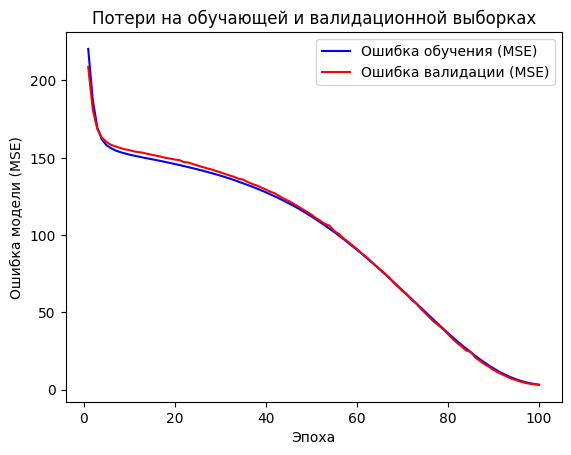

In [45]:
loss_function = regressorHistory.history['loss']
val_loss_function = regressorHistory.history['val_loss']
epochs = range(1,len(loss_function)+1)

plt.title('Потери на обучающей и валидационной выборках')
plt.plot(epochs,loss_function,color='blue',label='Ошибка обучения (MSE)')
plt.plot(epochs,val_loss_function,color='red',label='Ошибка валидации (MSE)')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка модели (MSE)')
plt.legend()

In [46]:
y_pred = regressorModel.predict(X_test)
y_pred

print(
    'MSE', 
    mean_squared_error(y_test, y_pred),
    'RMSE', 
    np.sqrt(mean_squared_error(y_test, y_pred)),
)

1122/1122 [==============================] - 1s 842us/step
MSE 2.951620098834719 RMSE 1.7180279680013126


### №3

In [47]:
regressorModel = Sequential()
regressorModel.add(Dense(20, activation='relu', input_dim=X_train.shape[1]))
regressorModel.add(Dense(1))
regressorModel.compile(
    optimizer='adam',
    loss='mse',
    metrics='mae'
)

In [48]:
regressorHistory = regressorModel.fit(
    X_train, 
    y_train, 
    batch_size=10, 
    epochs=150,
    validation_data=(X_val,y_val)
)

Epoch 1/150
6701/6701 [==============================] - 11s 2ms/step - loss: 204.4314 - mae: 12.3180 - val_loss: 185.0670 - val_mae: 11.5345
Epoch 2/150
6701/6701 [==============================] - 10s 1ms/step - loss: 170.0236 - mae: 10.9891 - val_loss: 167.4849 - val_mae: 10.8737
Epoch 3/150
6701/6701 [==============================] - 10s 1ms/step - loss: 159.6219 - mae: 10.5347 - val_loss: 160.2881 - val_mae: 10.5386
Epoch 4/150
6701/6701 [==============================] - 9s 1ms/step - loss: 155.3374 - mae: 10.3275 - val_loss: 157.0474 - val_mae: 10.3172
Epoch 5/150
6701/6701 [==============================] - 10s 1ms/step - loss: 152.5477 - mae: 10.1866 - val_loss: 154.1993 - val_mae: 10.2143
Epoch 6/150
6701/6701 [==============================] - 10s 1ms/step - loss: 150.4846 - mae: 10.0826 - val_loss: 152.3944 - val_mae: 10.1526
Epoch 7/150
6701/6701 [==============================] - 9s 1ms/step - loss: 148.7107 - mae: 10.0050 - val_loss: 150.7979 - val_mae: 10.0507
Epoch 8/

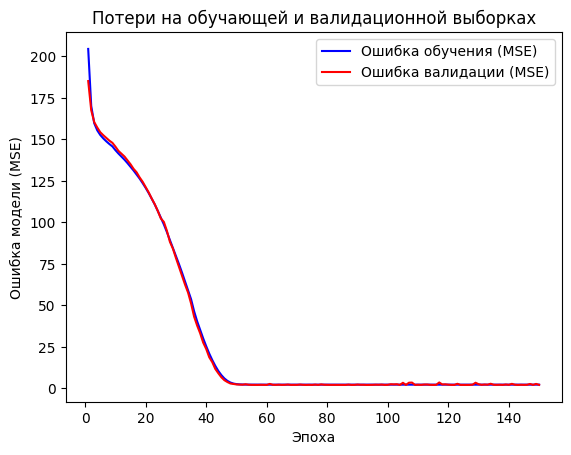

In [49]:
loss_function = regressorHistory.history['loss']
val_loss_function = regressorHistory.history['val_loss']
epochs = range(1,len(loss_function)+1)

plt.title('Потери на обучающей и валидационной выборках')
plt.plot(epochs,loss_function,color='blue',label='Ошибка обучения (MSE)')
plt.plot(epochs,val_loss_function,color='red',label='Ошибка валидации (MSE)')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка модели (MSE)')
plt.legend()

In [50]:
y_pred = regressorModel.predict(X_test)

print(
    'MSE', 
    mean_squared_error(y_test, y_pred),
    'RMSE', 
    np.sqrt(mean_squared_error(y_test, y_pred)),
)

1122/1122 [==============================] - 1s 858us/step
MSE 1.9729393207648778 RMSE 1.4046135841450764


## SimpleRNN

In [76]:
data = df['T'].values
data = MinMaxScaler().fit_transform(data.reshape(-1,1))
data = data.flatten()
window = 10

Y_index = np.arange(window, len(data), window)
Y = data[Y_index]

rows_x = len(Y)
X = data[range(window*rows_x)]
X = np.reshape(X, (rows_x, window,1))

print(X.shape, y.shape)
a = int(X.shape[0]*0.7)
b = int(X.shape[0]*0.9)

X_train = X[:a,:]
X_val = X[a:b:]
X_test = X[b:,:]

y_train = y[:a]
y_val = y[a:b]
y_test = y[b:]

(11965, 10, 1) (11965,)


### №1

In [110]:
modelSimpleRNN = Sequential()
modelSimpleRNN.add(SimpleRNN(10, activation='relu', input_shape = (window, 1)))
modelSimpleRNN.add(Dense(1, activation='linear'))
modelSimpleRNN.compile(optimizer='adam', loss='mse', metrics='mae')

In [79]:
historySimpleRNN = modelSimpleRNN.fit(
    X_train, 
    y_train, 
    Dense(1, activation='linear')

Epoch 1/20
280/280 [==============================] - 3s 5ms/step - loss: 0.0063 - mae: 0.0484 - val_loss: 7.5397e-04 - val_mae: 0.0213
Epoch 2/20
280/280 [==============================] - 2s 8ms/step - loss: 3.9851e-04 - mae: 0.0151 - val_loss: 3.4591e-04 - val_mae: 0.0139
Epoch 3/20
280/280 [==============================] - 1s 4ms/step - loss: 2.3977e-04 - mae: 0.0114 - val_loss: 2.3029e-04 - val_mae: 0.0109
Epoch 4/20
280/280 [==============================] - 1s 4ms/step - loss: 1.7582e-04 - mae: 0.0097 - val_loss: 1.9922e-04 - val_mae: 0.0104
Epoch 5/20
280/280 [==============================] - 1s 4ms/step - loss: 1.5222e-04 - mae: 0.0089 - val_loss: 1.8081e-04 - val_mae: 0.0097
Epoch 6/20
280/280 [==============================] - 1s 4ms/step - loss: 1.4949e-04 - mae: 0.0090 - val_loss: 1.9753e-04 - val_mae: 0.0107
Epoch 7/20
280/280 [==============================] - 1s 4ms/step - loss: 1.4650e-04 - mae: 0.0089 - val_loss: 1.8147e-04 - val_mae: 0.0099
Epoch 8/20
280/280 [====

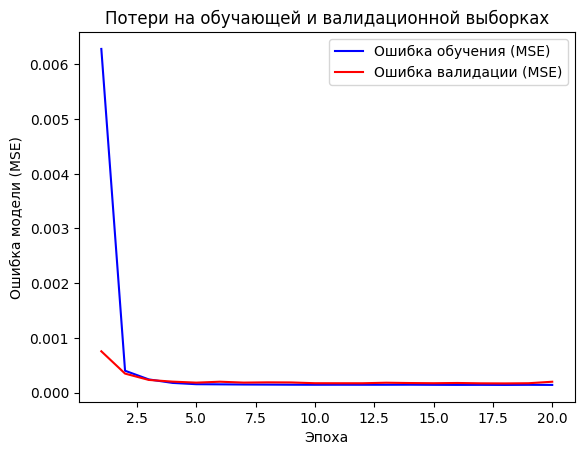

In [80]:
loss_function = historySimpleRNN.history['loss']
val_loss_function = historySimpleRNN.history['val_loss']
epochs = range(1,len(loss_function)+1)

plt.title('Потери на обучающей и валидационной выборках')
plt.plot(epochs,loss_function,color='blue',label='Ошибка обучения (MSE)')
plt.plot(epochs,val_loss_function,color='red',label='Ошибка валидации (MSE)')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка модели (MSE)')
plt.legend()

In [81]:
y_pred = modelSimpleRNN.predict(X_test)

print(
    'MSE', 
    mean_squared_error(y_test, y_pred),
    'RMSE', 
    np.sqrt(mean_squared_error(y_test, y_pred)),
)

38/38 [==============================] - 0s 2ms/step
MSE 0.0002503731636343 RMSE 0.01582318437086227


### №2

In [82]:
modelSimpleRNN = Sequential()
modelSimpleRNN.add(SimpleRNN(15, activation='relu'))
modelSimpleRNN.add(Dense(1, activation='linear'))
modelSimpleRNN.compile(optimizer='adam', loss='mse', metrics='mae')

In [83]:
historySimpleRNN = modelSimpleRNN.fit(
    X_train, 
    y_train, 
    epochs=20, 
    batch_size=10,
    validation_data=(X_val, y_val)
)

Epoch 1/20
838/838 [==============================] - 9s 5ms/step - loss: 3.1102e-04 - mae: 0.0126 - val_loss: 2.1007e-04 - val_mae: 0.0105
Epoch 2/20
838/838 [==============================] - 3s 4ms/step - loss: 1.7163e-04 - mae: 0.0098 - val_loss: 2.2466e-04 - val_mae: 0.0114
Epoch 3/20
838/838 [==============================] - 4s 4ms/step - loss: 1.5501e-04 - mae: 0.0092 - val_loss: 1.6967e-04 - val_mae: 0.0092
Epoch 4/20
838/838 [==============================] - 3s 4ms/step - loss: 1.5651e-04 - mae: 0.0094 - val_loss: 1.6528e-04 - val_mae: 0.0092
Epoch 5/20
838/838 [==============================] - 3s 3ms/step - loss: 1.4872e-04 - mae: 0.0090 - val_loss: 1.6789e-04 - val_mae: 0.0092
Epoch 6/20
838/838 [==============================] - 3s 4ms/step - loss: 1.5201e-04 - mae: 0.0091 - val_loss: 1.6403e-04 - val_mae: 0.0092
Epoch 7/20
838/838 [==============================] - 3s 4ms/step - loss: 1.5163e-04 - mae: 0.0091 - val_loss: 1.6545e-04 - val_mae: 0.0091
Epoch 8/20
838/838 [

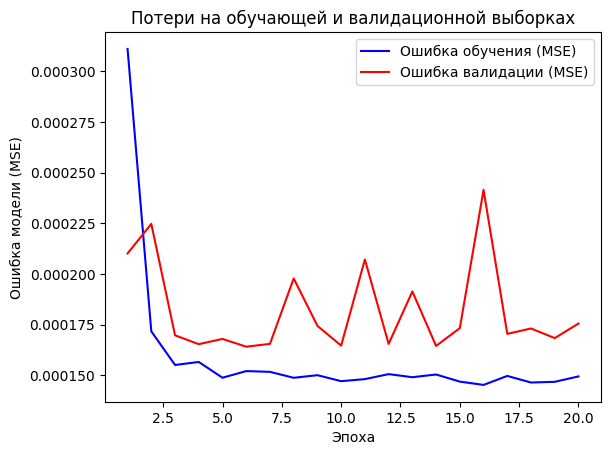

In [84]:
loss_function = historySimpleRNN.history['loss']
val_loss_function = historySimpleRNN.history['val_loss']
epochs = range(1,len(loss_function)+1)

plt.title('Потери на обучающей и валидационной выборках')
plt.plot(epochs,loss_function,color='blue',label='Ошибка обучения (MSE)')
plt.plot(epochs,val_loss_function,color='red',label='Ошибка валидации (MSE)')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка модели (MSE)')
plt.legend()

In [85]:
y_pred = modelSimpleRNN.predict(X_test)

print(
    'MSE', 
    mean_squared_error(y_test, y_pred),
    'RMSE', 
    np.sqrt(mean_squared_error(y_test, y_pred)),
)

38/38 [==============================] - 0s 2ms/step
MSE 0.00022549961025367937 RMSE 0.015016644440542614


### №3

In [86]:
modelSimpleRNN = Sequential()
modelSimpleRNN.add(SimpleRNN(20, activation='relu'))
modelSimpleRNN.add(Dense(1, activation='linear'))
modelSimpleRNN.compile(optimizer='adam', loss='mse', metrics='mae')

In [87]:
historySimpleRNN = modelSimpleRNN.fit(
    X_train, 
    y_train, 
    epochs=50, 
    batch_size=10,
    validation_data=(X_val, y_val)
)

Epoch 1/50
838/838 [==============================] - 7s 6ms/step - loss: 0.0642 - mae: 0.0933 - val_loss: 2.3697e-04 - val_mae: 0.0115
Epoch 2/50
838/838 [==============================] - 5s 6ms/step - loss: 1.9735e-04 - mae: 0.0105 - val_loss: 2.3511e-04 - val_mae: 0.0117
Epoch 3/50
838/838 [==============================] - 4s 5ms/step - loss: 1.8659e-04 - mae: 0.0102 - val_loss: 2.2398e-04 - val_mae: 0.0112
Epoch 4/50
838/838 [==============================] - 3s 3ms/step - loss: 1.8449e-04 - mae: 0.0102 - val_loss: 2.0696e-04 - val_mae: 0.0106
Epoch 5/50
838/838 [==============================] - 3s 4ms/step - loss: 1.7583e-04 - mae: 0.0099 - val_loss: 1.8971e-04 - val_mae: 0.0101
Epoch 6/50
838/838 [==============================] - 4s 5ms/step - loss: 1.6843e-04 - mae: 0.0097 - val_loss: 1.8435e-04 - val_mae: 0.0099
Epoch 7/50
838/838 [==============================] - 3s 4ms/step - loss: 1.6565e-04 - mae: 0.0096 - val_loss: 2.1367e-04 - val_mae: 0.0113
Epoch 8/50
838/838 [====

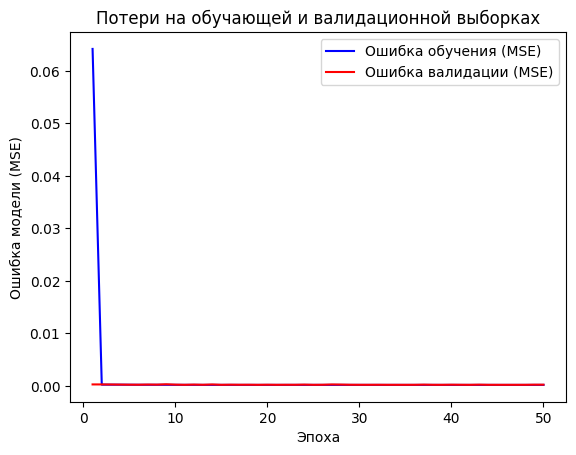

In [88]:
loss_function = historySimpleRNN.history['loss']
val_loss_function = historySimpleRNN.history['val_loss']
epochs = range(1,len(loss_function)+1)

plt.title('Потери на обучающей и валидационной выборках')
plt.plot(epochs,loss_function,color='blue',label='Ошибка обучения (MSE)')
plt.plot(epochs,val_loss_function,color='red',label='Ошибка валидации (MSE)')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка модели (MSE)')
plt.legend()

In [89]:
y_pred = modelSimpleRNN.predict(X_test)

print(
    'MSE', 
    mean_squared_error(y_test, y_pred),
    'RMSE', 
    np.sqrt(mean_squared_error(y_test, y_pred)),
)

38/38 [==============================] - 0s 2ms/step
MSE 0.00023393031533655491 RMSE 0.015294780656699687


## LSTM

In [92]:
windows = 10

n_samples = int(data.shape[0]-window)

n_train_samples = int(data.shape[0]*0.7)
n_val_samples = int(data.shape[0]*0.15)
n_test_samples = int(n_samples-n_train_samples-n_val_samples)

X_train=np.zeros((n_train_samples,window))
y_train=np.zeros(n_train_samples)

X_val=np.zeros((n_val_samples,window))
y_val=np.zeros(n_val_samples)

X_test=np.zeros((n_test_samples,window))
y_test=np.zeros(n_test_samples)

for i in range(n_train_samples):
  for j in range(window):
    X_train[i,j]=data[i+j]
  y_train[i]=data[i+window]

for i in range(n_val_samples):
  for j in range(window):
    X_val[i,j]=data[n_train_samples+i+j]
  y_val[i]=data[n_train_samples+i+window]

for i in range(n_test_samples):
  for j in range(window):
    X_test[i,j]=data[n_train_samples+n_val_samples+i+j]
  y_test[i]=data[n_train_samples+n_val_samples+i+window]
  
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_val = np.reshape(X_val,(X_val.shape[0],X_val.shape[1],1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

### №1

In [93]:
modelLSTM = Sequential()
modelLSTM.add(LSTM(5, activation='relu'))
modelLSTM.add(Dense(1, activation='linear'))
modelLSTM.compile(optimizer='adam', loss='mse', metrics='mae')

In [94]:
historyLSTM = modelLSTM.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=10,
    validation_data=(X_val,y_val)
)

Epoch 1/20
8376/8376 [==============================] - 48s 5ms/step - loss: 0.0010 - mae: 0.0160 - val_loss: 1.9711e-04 - val_mae: 0.0103
Epoch 2/20
8376/8376 [==============================] - 49s 6ms/step - loss: 1.5380e-04 - mae: 0.0091 - val_loss: 2.0793e-04 - val_mae: 0.0112
Epoch 3/20
8376/8376 [==============================] - 40s 5ms/step - loss: 1.4536e-04 - mae: 0.0088 - val_loss: 1.7167e-04 - val_mae: 0.0094
Epoch 4/20
8376/8376 [==============================] - 42s 5ms/step - loss: 1.4455e-04 - mae: 0.0088 - val_loss: 1.7125e-04 - val_mae: 0.0092
Epoch 5/20
8376/8376 [==============================] - 46s 5ms/step - loss: 1.4344e-04 - mae: 0.0087 - val_loss: 1.7959e-04 - val_mae: 0.0096
Epoch 6/20
8376/8376 [==============================] - 39s 5ms/step - loss: 1.4313e-04 - mae: 0.0087 - val_loss: 2.2302e-04 - val_mae: 0.0114
Epoch 7/20
8376/8376 [==============================] - 37s 4ms/step - loss: 1.4273e-04 - mae: 0.0087 - val_loss: 1.7345e-04 - val_mae: 0.0094
Epo

In [95]:
y_pred = modelLSTM.predict(X_test)

561/561 [==============================] - 2s 3ms/step


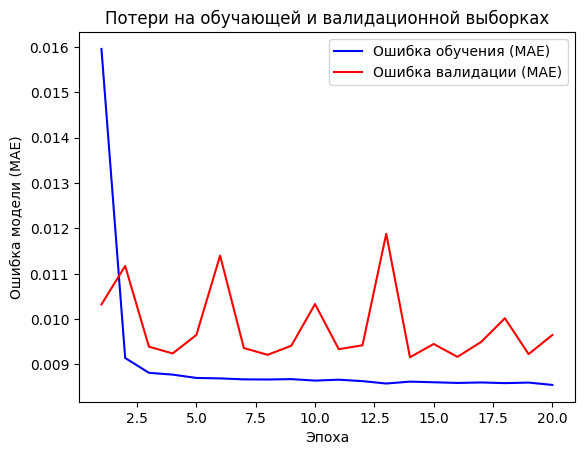

In [96]:
mae = historyLSTM.history['mae']
val_mae = historyLSTM.history['val_mae']
epochs = range(1,len(mae)+1)

plt.title('Потери на обучающей и валидационной выборках')
plt.plot(epochs,mae,color='blue',label='Ошибка обучения (MAE)')
plt.plot(epochs,val_mae,color='red',label='Ошибка валидации (MAE)')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка модели (MAE)')
plt.legend()

In [97]:
y_pred = modelLSTM.predict(X_test)

print(
    'MSE', 
    mean_squared_error(y_test, y_pred),
    'RMSE', 
    np.sqrt(mean_squared_error(y_test, y_pred)),
)

561/561 [==============================] - 2s 3ms/step
MSE 0.0002298036967412902 RMSE 0.01515927757979549


### №2

In [98]:
modelLSTM = Sequential()
modelLSTM.add(LSTM(10, activation='relu'))
modelLSTM.add(Dense(1, activation='linear'))
modelLSTM.compile(optimizer='adam', loss='mse', metrics='mae')

In [99]:
historyLSTM = modelLSTM.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=10,
    validation_data=(X_val,y_val)
)

Epoch 1/30
8376/8376 [==============================] - 65s 7ms/step - loss: 0.0015 - mae: 0.0173 - val_loss: 2.4604e-04 - val_mae: 0.0116
Epoch 2/30
8376/8376 [==============================] - 55s 7ms/step - loss: 1.7687e-04 - mae: 0.0099 - val_loss: 2.1372e-04 - val_mae: 0.0110
Epoch 3/30
8376/8376 [==============================] - 57s 7ms/step - loss: 1.5312e-04 - mae: 0.0091 - val_loss: 2.0776e-04 - val_mae: 0.0108
Epoch 4/30
8376/8376 [==============================] - 63s 8ms/step - loss: 1.4977e-04 - mae: 0.0090 - val_loss: 1.6972e-04 - val_mae: 0.0094
Epoch 5/30
8376/8376 [==============================] - 67s 8ms/step - loss: 1.4735e-04 - mae: 0.0089 - val_loss: 2.4497e-04 - val_mae: 0.0122
Epoch 6/30
8376/8376 [==============================] - 64s 8ms/step - loss: 1.4667e-04 - mae: 0.0088 - val_loss: 1.7110e-04 - val_mae: 0.0095
Epoch 7/30
8376/8376 [==============================] - 63s 8ms/step - loss: 1.4625e-04 - mae: 0.0089 - val_loss: 1.7933e-04 - val_mae: 0.0096
Epo

In [100]:
y_pred = modelLSTM.predict(X_test)

561/561 [==============================] - 2s 2ms/step


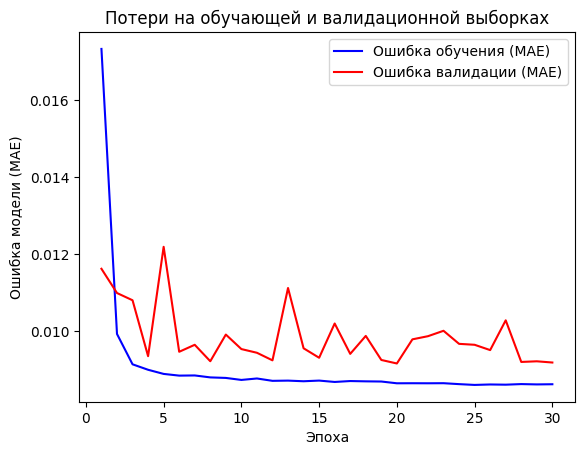

In [101]:
mae = historyLSTM.history['mae']
val_mae = historyLSTM.history['val_mae']
epochs = range(1,len(mae)+1)

plt.title('Потери на обучающей и валидационной выборках')
plt.plot(epochs,mae,color='blue',label='Ошибка обучения (MAE)')
plt.plot(epochs,val_mae,color='red',label='Ошибка валидации (MAE)')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка модели (MAE)')
plt.legend()

In [102]:
y_pred = modelLSTM.predict(X_test)

print(
    'MSE', 
    mean_squared_error(y_test, y_pred),
    'RMSE', 
    np.sqrt(mean_squared_error(y_test, y_pred)),
)

561/561 [==============================] - 1s 2ms/step
MSE 0.00021800153355142012 RMSE 0.014764874992746133


### №3

In [103]:
modelLSTM = Sequential()
modelLSTM.add(LSTM(10, activation='tanh'))
modelLSTM.add(Dense(1, activation='linear'))
modelLSTM.compile(optimizer='adam', loss='mse', metrics='mae')

In [104]:
historyLSTM = modelLSTM.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=10,
    validation_data=(X_val,y_val)
)

Epoch 1/10
8376/8376 [==============================] - 74s 8ms/step - loss: 6.6365e-04 - mae: 0.0147 - val_loss: 1.9282e-04 - val_mae: 0.0101
Epoch 2/10
8376/8376 [==============================] - 62s 7ms/step - loss: 1.5273e-04 - mae: 0.0091 - val_loss: 1.8806e-04 - val_mae: 0.0103
Epoch 3/10
8376/8376 [==============================] - 59s 7ms/step - loss: 1.4506e-04 - mae: 0.0088 - val_loss: 1.7573e-04 - val_mae: 0.0097
Epoch 4/10
8376/8376 [==============================] - 65s 8ms/step - loss: 1.4346e-04 - mae: 0.0087 - val_loss: 1.7466e-04 - val_mae: 0.0097
Epoch 5/10
8376/8376 [==============================] - 66s 8ms/step - loss: 1.4243e-04 - mae: 0.0087 - val_loss: 1.8563e-04 - val_mae: 0.0103
Epoch 6/10
8376/8376 [==============================] - 58s 7ms/step - loss: 1.4179e-04 - mae: 0.0086 - val_loss: 1.7700e-04 - val_mae: 0.0098
Epoch 7/10
8376/8376 [==============================] - 63s 8ms/step - loss: 1.4149e-04 - mae: 0.0086 - val_loss: 1.7148e-04 - val_mae: 0.0095

In [105]:
y_pred = modelLSTM.predict(X_test)

561/561 [==============================] - 4s 4ms/step


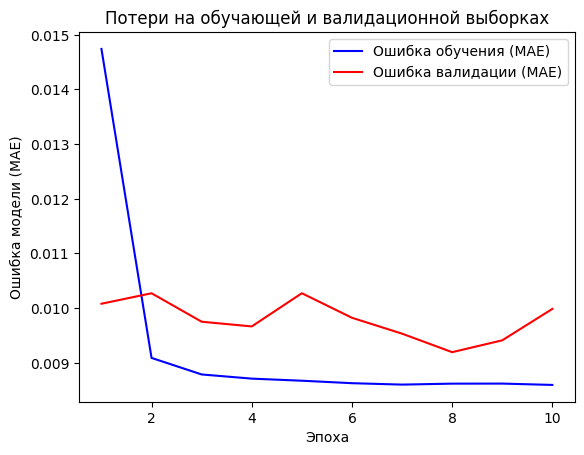

In [106]:
mae = historyLSTM.history['mae']
val_mae = historyLSTM.history['val_mae']
epochs = range(1,len(mae)+1)

plt.title('Потери на обучающей и валидационной выборках')
plt.plot(epochs,mae,color='blue',label='Ошибка обучения (MAE)')
plt.plot(epochs,val_mae,color='red',label='Ошибка валидации (MAE)')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка модели (MAE)')
plt.legend()

In [107]:
y_pred = modelLSTM.predict(X_test)

print(
    'MSE', 
    mean_squared_error(y_test, y_pred),
    'RMSE', 
    np.sqrt(mean_squared_error(y_test, y_pred)),
)

561/561 [==============================] - 2s 4ms/step
MSE 0.00023401067083248146 RMSE 0.01529740732387294
